In [2]:
# Packages
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

In [25]:
# Import both grid search results
path = r'C:\Users\user\Desktop\KUL - Mstat\Big Data Platforms and Technologies\project' # Change path here
results_lightgbm = pd.read_csv(path + r'\lightbgm_gridsearch_results.csv')
results_rf = pd.read_csv(path + r'\rf_results.csv')

Grid search results of LightGBM

In [26]:
# Actual statistics
performance_metric_mean = results_lightgbm.groupby(['k_neighbors', 'number of leaves', 'learning rate'])['sum_top100'].apply(np.mean).reset_index()
performance_metric_std = results_lightgbm.groupby(['k_neighbors', 'number of leaves', 'learning rate'])['sum_top100'].apply(np.std).reset_index()

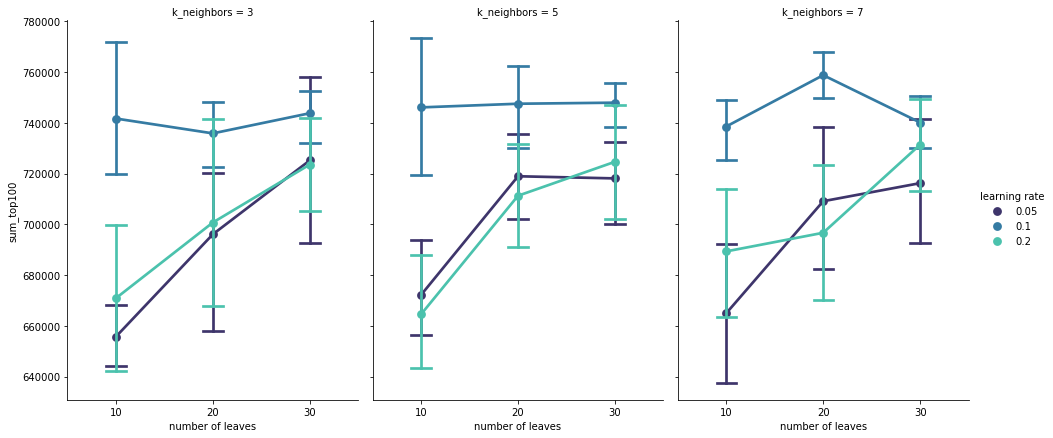

In [45]:
ax = sns.catplot(x = 'number of leaves', y = 'sum_top100', hue = 'learning rate', 
                 col = 'k_neighbors', data = results_lightgbm,
                kind = 'point', capsize = 0.2, palette = 'mako', 
                 height = 6, aspect = 0.75)
plt.savefig('lightgbm_results1.png', bbox_inches = 'tight', dpi = 300)

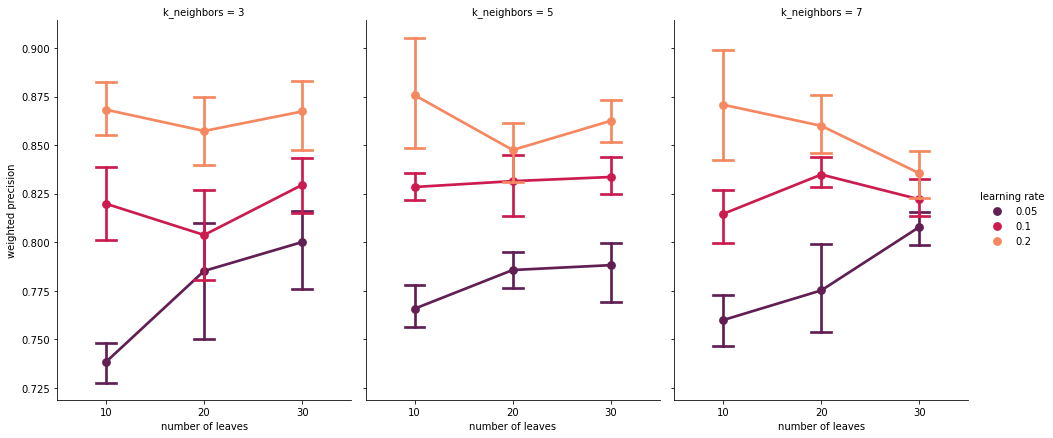

In [50]:
ax = sns.catplot(x = 'number of leaves', y = 'cv_precision_score', hue = 'learning rate', 
                 col = 'k_neighbors', data = results_lightgbm,
                kind = 'point', capsize = 0.2, palette = 'rocket', 
                 height = 6, aspect = 0.75)
ax.set_ylabels('weighted precision')
plt.savefig('lightgbm_results2.png', bbox_inches = 'tight', dpi = 300)

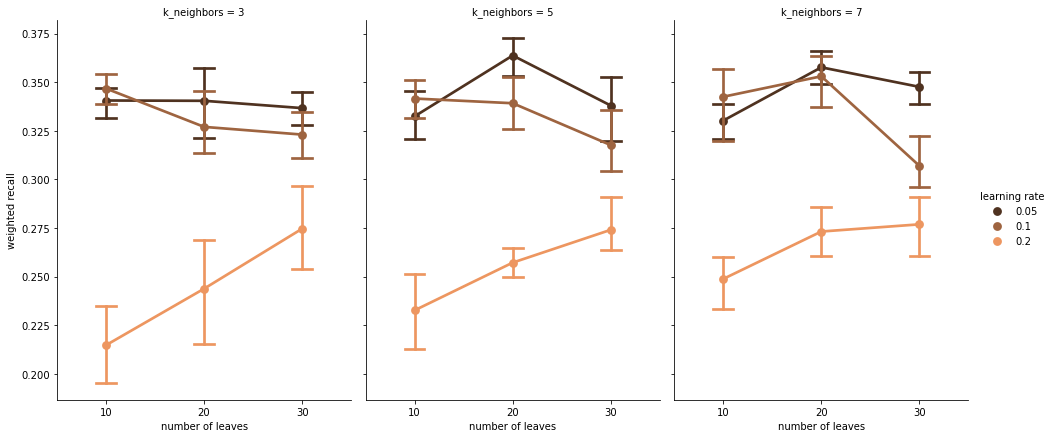

In [52]:
ax = sns.catplot(x = 'number of leaves', y = 'cv_recall_score', hue = 'learning rate', 
                 col = 'k_neighbors', data = results_lightgbm,
                kind = 'point', capsize = 0.2, palette = 'copper', 
                 height = 6, aspect = 0.75)
ax.set_ylabels('weighted recall')
plt.savefig('lightgbm_results3.png', bbox_inches = 'tight', dpi = 300)

In [59]:
results_lightgbm.groupby(['k_neighbors', 'number of leaves', 'learning rate']).agg([np.mean, np.std])[['cv_precision_score', 'cv_recall_score', 'sum_top100']].round(3)

cv_precision_score         \
                                                         mean    std   
k_neighbors number of leaves learning rate                             
3           10               0.05                       0.738  0.013   
                             0.10                       0.820  0.024   
                             0.20                       0.868  0.019   
            20               0.05                       0.785  0.041   
                             0.10                       0.804  0.030   
                             0.20                       0.857  0.023   
            30               0.05                       0.800  0.027   
                             0.10                       0.830  0.018   
                             0.20                       0.867  0.023   
5           10               0.05                       0.766  0.014   
                             0.10                       0.828  0.009   
                             0.20                       0.876  0.038   
            20               0.05                       0.786  0.012   
                             0.10                       0.831  0.020   
                             0.20                       0.847  0.020   
            30               0.05                       0.788  0.021   
                             0.10                       0.834  0.012   
                             0.20                       0.863  0.014   
7           10               0.05                       0.760  0.019   
                             0.10                       0.815  0.018   
                             0.20                       0.871  0.038   
            20               0.05                       0.775  0.029   
                             0.10                       0.835  0.011   
                             0.20                       0.860  0.020   
            30               0.05                       0.808  0.012   
                             0.10                       0.822  0.013   
                             0.20                       0.835  0.015   

                                           cv_recall_score         sum_top100  \
                                                      mean    std        mean   
k_neighbors number of leaves learning rate                                      
3           10               0.05                    0.341  0.010  655697.796   
                             0.10                    0.347  0.010  741741.574   
                             0.20                    0.215  0.028  670873.054   
            20               0.05                    0.340  0.024  696093.210   
                             0.10                    0.327  0.021  735885.148   
                             0.20                    0.244  0.033  700734.490   
            30               0.05                    0.337  0.012  725240.990   
                             0.10                    0.323  0.015  743835.654   
                             0.20                    0.275  0.028  723609.418   
5           10               0.05                    0.332  0.016  672177.372   
                             0.10                    0.342  0.012  746131.390   
                             0.20                    0.233  0.025  664534.590   
            20               0.05                    0.364  0.013  718978.056   
                             0.10                    0.339  0.017  747573.982   
                             0.20                    0.257  0.009  711298.310   
            30               0.05                    0.338  0.021  718134.538   
                             0.10                    0.318  0.019  747993.144   
                             0.20                    0.274  0.019  724690.964   
7           10               0.05                    0.330  0.012  664953.358   
                             0.10                    0.343  0.024  738594.254   
                   

In [81]:
print(results_lightgbm.groupby(['k_neighbors', 'number of leaves', 'learning rate']).agg([np.mean, np.std])[['cv_precision_score', 'cv_recall_score', 'sum_top100']].round(3).to_latex())

\begin{tabular}{lllrrrrrr}
\toprule
  &    &      & \multicolumn{2}{l}{cv\_precision\_score} & \multicolumn{2}{l}{cv\_recall\_score} & \multicolumn{2}{l}{sum\_top100} \\
  &    &      &               mean &    std &            mean &    std &        mean &        std \\
k\_neighbors & number of leaves & learning rate &                    &        &                 &        &             &            \\
\midrule
3 & 10 & 0.05 &              0.738 &  0.013 &           0.341 &  0.010 &  655697.796 &  15559.911 \\
  &    & 0.10 &              0.820 &  0.024 &           0.347 &  0.010 &  741741.574 &  33974.224 \\
  &    & 0.20 &              0.868 &  0.019 &           0.215 &  0.028 &  670873.054 &  36144.452 \\
  & 20 & 0.05 &              0.785 &  0.041 &           0.340 &  0.024 &  696093.210 &  42002.116 \\
  &    & 0.10 &              0.804 &  0.030 &           0.327 &  0.021 &  735885.148 &  16261.444 \\
  &    & 0.20 &              0.857 &  0.023 &           0.244 &  0.033 &  700734

Grid search results of Random forest

In [61]:
# Actual statistics
performance_metric_mean = results_rf.groupby(['k_neighbors', 'max_features'])['sum_top100'].apply(np.mean).reset_index()
performance_metric_std = results_rf.groupby(['k_neighbors', 'max_features'])['sum_top100'].apply(np.std).reset_index()

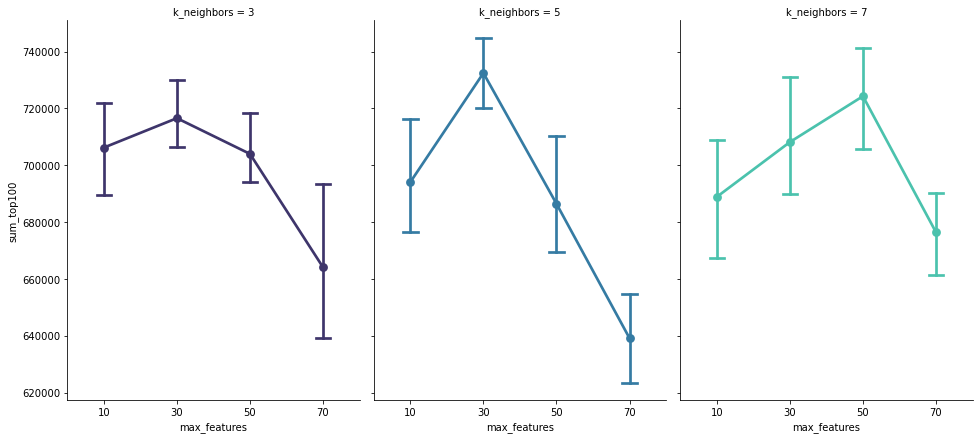

In [66]:
ax = sns.catplot(x = 'max_features', y = 'sum_top100', hue = 'k_neighbors',
                 col = 'k_neighbors', data = results_rf,
                kind = 'point', capsize = 0.2, palette = 'mako', 
                 height = 6, aspect = 0.75)
plt.savefig('rf_results1.png', bbox_inches = 'tight', dpi = 300)

In [67]:
results_rf.groupby(['k_neighbors', 'max_features']).agg([np.mean, np.std])[['cv_precision_score', 'cv_recall_score', 'sum_top100']].round(3)

cv_precision_score        cv_recall_score         \
                                       mean    std            mean    std   
k_neighbors max_features                                                    
3           10                        0.833  0.021           0.315  0.013   
            30                        0.824  0.018           0.332  0.014   
            50                        0.792  0.020           0.329  0.019   
            70                        0.764  0.020           0.285  0.016   
5           10                        0.819  0.011           0.314  0.007   
            30                        0.808  0.020           0.337  0.013   
            50                        0.789  0.016           0.316  0.009   
            70                        0.765  0.016           0.292  0.017   
7           10                        0.814  0.025           0.318  0.010   
            30                        0.788  0.013           0.323  0.019   
            50                        0.782  0.026           0.334  0.007   
            70                        0.760  0.024           0.298  0.011   

                          sum_top100             
                                mean        std  
k_neighbors max_features                         
3           10            706219.358  20257.091  
            30            716573.854  14730.861  
            50            704003.970  16013.225  
            70            664109.882  34244.835  
5           10            694093.324  27366.471  
            30            732457.338  16634.812  
            50            686474.208  26916.806  
            70            639165.562  20233.441  
7           10            688889.220  26996.255  
            30            708163.428  24218.492  
            50            724303.702  23983.588  
            70            676431.760  17991.182

In [80]:
print(results_rf.groupby(['k_neighbors', 'max_features']).agg([np.mean, np.std])[['cv_precision_score', 'cv_recall_score', 'sum_top100']].round(3).to_latex())

\begin{tabular}{llrrrrrr}
\toprule
  &    & \multicolumn{2}{l}{cv\_precision\_score} & \multicolumn{2}{l}{cv\_recall\_score} & \multicolumn{2}{l}{sum\_top100} \\
  &    &               mean &    std &            mean &    std &        mean &        std \\
k\_neighbors & max\_features &                    &        &                 &        &             &            \\
\midrule
3 & 10 &              0.833 &  0.021 &           0.315 &  0.013 &  706219.358 &  20257.091 \\
  & 30 &              0.824 &  0.018 &           0.332 &  0.014 &  716573.854 &  14730.861 \\
  & 50 &              0.792 &  0.020 &           0.329 &  0.019 &  704003.970 &  16013.225 \\
  & 70 &              0.764 &  0.020 &           0.285 &  0.016 &  664109.882 &  34244.835 \\
5 & 10 &              0.819 &  0.011 &           0.314 &  0.007 &  694093.324 &  27366.471 \\
  & 30 &              0.808 &  0.020 &           0.337 &  0.013 &  732457.338 &  16634.812 \\
  & 50 &              0.789 &  0.016 &           0.316 